# Plotting ORCID and open access prevalence

## ORCID

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # version 3.5.2
import pickle
import operator
from itertools import groupby

In [45]:
authors = pd.read_pickle("./data/single_authors_per_journal.pkl")
authors

,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,inst_country_code,...,host_display_name,publisher,host_type,host_url,is_host_oa,host_version,host_license,is_oa,oa_status,oa_url
0,https://openalex.org/W2623899450,first,https://openalex.org/A2622763940,Nattapon Nopporncharoenkul,https://orcid.org/0000-0002-9477-0625,"Department of Plant Science, Faculty of Scienc...",https://openalex.org/I25399158,Mahidol University,https://ror.org/01znkr924,TH,...,Journal of Systematics and Evolution,Wiley-Blackwell,journal,None,False,None,None,False,closed,None
1,https://openalex.org/W3015213345,first,https://openalex.org/A3015220692,Yi‐Qin Xu,None,Ministry of Education Key Laboratory for Biodi...,https://openalex.org/I24943067,Fudan University,https://ror.org/013q1eq08,CN,...,Journal of Systematics and Evolution,Wiley-Blackwell,journal,None,False,None,None,False,closed,None
2,https://openalex.org/W4307887592,middle,https://openalex.org/A4307888260,Lucia Varaldo,None,Department of DISTAVUniversity of GenoaCorso E...,None,Department of DISTAVUniversity of GenoaCorso E...,None,None,...,Journal of Systematics and Evolution,Wiley-Blackwell,journal,None,False,None,None,False,closed,None
3,https://openalex.org/W2963593978,first,https://openalex.org/A2490906191,Shan-Shan Li,None,State Key Laboratory of Systematic and Evoluti...,None,State Key Laboratory of Systematic and Evoluti...,None,None,...,Journal of Systematics and Evolution,Wiley-Blackwell,journal,None,False,None,None,False,closed,None
4,https://openalex.org/W1908672312,middle,https://openalex.org/A2706113771,Jinhuo Jiang,None,College of Life SciencesZhejiang UniversityHan...,https://openalex.org/I118810699,Hangzhou University,None,CN,...,Journal of Systematics and Evolution,Wiley-Blackwell,journal,None,False,None,None,False,closed,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,https://openalex.org/W4297836291,middle,https://openalex.org/A4282626686,"Yodthong, Siriporn",None,"Thaksin University, Phattalung, Thailand",https://openalex.org/I79246082,Thaksin University,https://ror.org/00t2prd39,TH,...,Zoosystematics and Evolution,Pensoft Publishers,journal,https://zse.pensoft.net/article/89591/download...,True,publishedVersion,cc-by,True,gold,https://zse.pensoft.net/article/89591/download...
717,https://openalex.org/W3033893622,first,https://openalex.org/A2126922470,Raffael Ernst,https://orcid.org/0000-0001-6347-1414,,None,None,None,None,...,Zoosystematics and Evolution,Pensoft Publishers,journal,https://zse.pensoft.net/article/51997/download...,True,publishedVersion,cc-by,True,gold,https://zse.pensoft.net/article/51997/download...
718,https://openalex.org/W2126688941,middle,https://openalex.org/A4272586102,None Seethaler,None,"Charité Human Remains Project, Institute of Ve...",https://openalex.org/I7877124,Charité - University Medicine Berlin,https://ror.org/001w7jn25,DE,...,Zoosystematics and Evolution,Pensoft Publishers,journal,None,False,None,None,False,closed,None
719,https://openalex.org/W3184830308,middle,https://openalex.org/A2158309143,Renner Luiz Cerqueira Baptista,https://orcid.org/0000-0002-2372-5034,,None,None,None,None,...,Zoosystematics and Evolution,Pensoft Publishers,journal,https://zse.pensoft.net/article/67788/download...,True,publishedVersion,cc-by,True,gold,https://zse.pensoft.net/article/67788/download...


In [46]:
# get single authorship PER JOURNAL
journal_names = sorted(list(set(singles_journal["host_display_name"])))
data_plot = pd.DataFrame(columns = journal_names, index = ["authors", "orcids"])

for j in journal_names:
    df = singles_journal[singles_journal["host_display_name"]==j]
    
    data_plot.at["authors", j] = len(df.index)
    data_plot.at["orcids", j] = len(df.index) - df["orcid"].count(None) 
    # watch out, "count(None)" actually counts how many values are NOT None

data_plot

,"Animal Systematics, Evolution and Diversity",Australian Systematic Botany,Bionomina,European journal of taxonomy,Graellsia,Insect systematics and diversity,Journal of Systematics and Evolution,Kew Bulletin,Korean Journal of Plant Taxonomy,Megataxa,...,Systematic Biology,Systematic Entomology,Taxon,The Auk,The Bulletin of zoological nomenclature,Willdenowia,ZooKeys,Zoologica Scripta,Zoosystematics and Evolution,Zootaxa
authors,436,600,143,2707,391,566,3156,1174,43,83,...,2841,2005,4171,2415,749,712,10832,2289,721,27897
orcids,219,248,44,1137,138,212,1459,572,0,32,...,910,800,1653,1099,425,341,5616,777,362,16282


In [47]:
sum(data_plot.loc["authors"])

97564

In [48]:
sum(data_plot.loc["orcids"])

48149

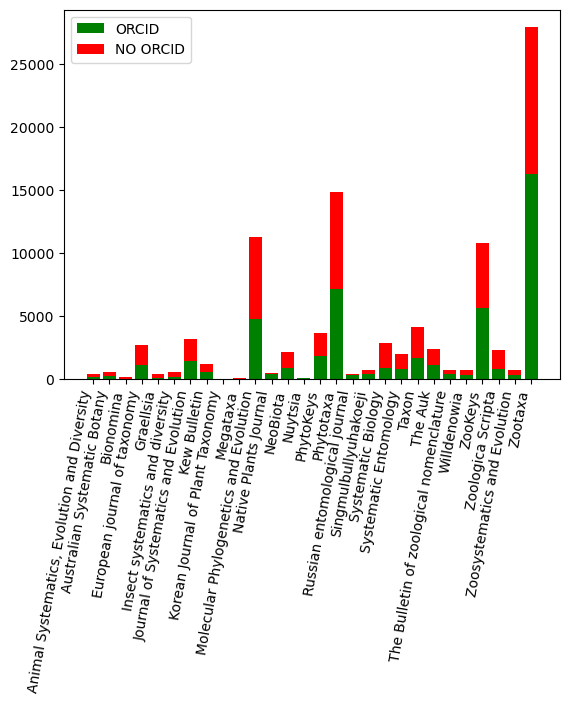

<Figure size 640x480 with 0 Axes>

In [49]:
labels = data_plot.keys()
no_orcid = list(map(operator.sub, list(data_plot.loc["authors",]), list(data_plot.loc["orcids",])))

fig, ax = plt.subplots()

ax.bar(labels, data_plot.loc["orcids",],
       label="ORCID", color="green")
ax.bar(labels, no_orcid, bottom=data_plot.loc["orcids",],
       label="NO ORCID", color="red")
ax.legend()

plt.xticks(rotation=80, ha="right")
plt.show()

plt.savefig("./figures/absolute_orcid_authors_journals.png")

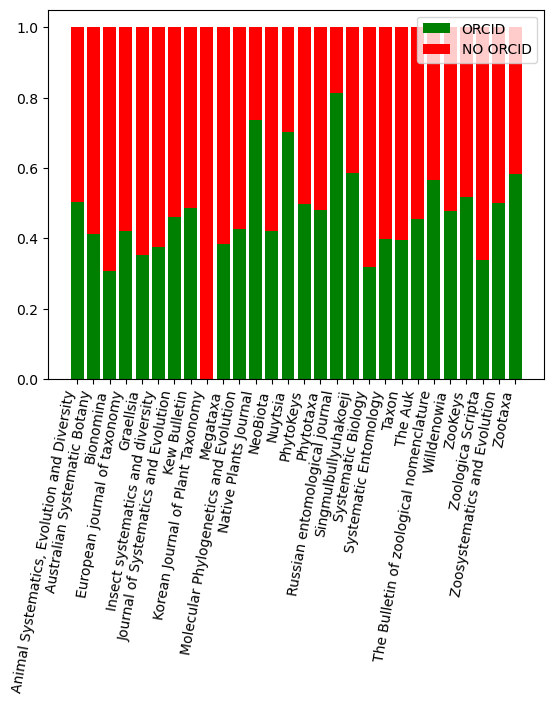

<Figure size 640x480 with 0 Axes>

In [51]:
perc_orcids = np.divide(data_plot.loc["orcids",], data_plot.loc["authors",])
perc_no_orcids = 1 - perc_orcids

fig, ax = plt.subplots()

ax.bar(labels, perc_orcids,
       label="ORCID", color="green")
ax.bar(labels, perc_no_orcids, bottom=perc_orcids,
       label="NO ORCID", color="red")
ax.legend()

plt.xticks(rotation=80, ha="right")
plt.show()

plt.savefig("./figures/relative_orcid_authors_journals.png")

## Open access

In [9]:
articles = pd.read_pickle("./data/articles_from_journals_full.pkl")
articles

,id,doi,title,display_name,publication_year,publication_date,ids,host_venue,type,open_access,...,host_display_name,publisher,host_type,host_url,is_host_oa,host_version,host_license,is_oa,oa_status,oa_url
0,https://openalex.org/W2765496928,https://doi.org/10.1093/isd/ixx003,Anchored Hybrid Enrichment-Based Phylogenomics...,Anchored Hybrid Enrichment-Based Phylogenomics...,2017,2017-10-25,{'openalex': 'https://openalex.org/W2765496928...,"{'id': 'https://openalex.org/V4210235066', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'bronze', 'oa_url...",...,Insect systematics and diversity,Oxford University Press,journal,None,False,None,None,True,bronze,https://academic.oup.com/isd/article-pdf/1/1/5...
1,https://openalex.org/W2904902663,https://doi.org/10.1093/isd/ixy018,Species Delineation Within the Euwallacea forn...,Species Delineation Within the Euwallacea forn...,2018,2018-11-01,{'openalex': 'https://openalex.org/W2904902663...,"{'id': 'https://openalex.org/V4210235066', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'bronze', 'oa_url...",...,Insect systematics and diversity,Oxford University Press,journal,https://academic.oup.com/isd/article-pdf/2/6/2...,True,publishedVersion,None,True,bronze,https://academic.oup.com/isd/article-pdf/2/6/2...
2,https://openalex.org/W2996165219,https://doi.org/10.1093/isd/ixz024,Higher-Level Phylogeny and Reclassification of...,Higher-Level Phylogeny and Reclassification of...,2019,2019-11-01,{'openalex': 'https://openalex.org/W2996165219...,"{'id': 'https://openalex.org/V4210235066', 'is...",journal-article,"{'is_oa': False, 'oa_status': 'closed', 'oa_ur...",...,Insect systematics and diversity,Oxford University Press,journal,None,False,None,None,False,closed,None
3,https://openalex.org/W2883729471,https://doi.org/10.1093/isd/ixy008,"Evolution, Diversification, and Biogeography o...","Evolution, Diversification, and Biogeography o...",2018,2018-07-01,{'openalex': 'https://openalex.org/W2883729471...,"{'id': 'https://openalex.org/V4210235066', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'bronze', 'oa_url...",...,Insect systematics and diversity,Oxford University Press,journal,https://academic.oup.com/isd/article-pdf/2/4/3...,True,publishedVersion,None,True,bronze,https://academic.oup.com/isd/article-pdf/2/4/3...
4,https://openalex.org/W3123906059,https://doi.org/10.1093/isd/ixz016,Understanding UCEs: A Comprehensive Primer on ...,Understanding UCEs: A Comprehensive Primer on ...,2019,2019-09-03,{'openalex': 'https://openalex.org/W3123906059...,"{'id': 'https://openalex.org/V4210235066', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'green', 'oa_url'...",...,Insect systematics and diversity,Oxford University Press,journal,None,False,None,None,True,green,https://www.preprints.org/manuscript/201905.03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58955,https://openalex.org/W4313322893,https://doi.org/10.1002/tax.12863,"One in, one out: Generic circumscription withi...","One in, one out: Generic circumscription withi...",2022,2022-12-31,{'openalex': 'https://openalex.org/W4313322893...,"{'id': 'https://openalex.org/V163860444', 'iss...",journal-article,"{'is_oa': True, 'oa_status': 'green', 'oa_url'...",...,Taxon,Wiley,journal,None,False,None,None,True,green,https://hal.inrae.fr/hal-03946235/document
58956,https://openalex.org/W4317214345,https://doi.org/10.1002/tax.12864,Phylogeny based generic reclassification of <i...,Phylogeny based generic reclassification of <i...,2023,2023-01-18,{'openalex': 'https://openalex.org/W4317214345...,"{'id': 'https://openalex.org/V163860444', 'iss...",journal-article,"{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...",...,Taxon,Wiley,journal,https://doi.org/10.1002/tax.12864,True,publishedVersion,cc-by-nc,True,hybrid,https://doi.org/10.1002/tax.12864
58957,https://openalex.org/W568755969,https://doi.org/10.12705/642.13,(038–039) Two proposals to deal with reprints ...,(038–039) Two proposa

In [10]:
set(articles["oa_status"])

{None, 'bronze', 'closed', 'gold', 'green', 'hybrid'}

In [13]:
# get oa statuses of articles PER JOURNAL
journal_names = sorted(list(set(articles["host_display_name"])))
data_plot = pd.DataFrame()

for j in journal_names:
    journal_df = articles[articles["host_display_name"]==j]
    oa_statuses = list(journal_df["oa_status"].fillna("unknown"))
    oa_statuses = sorted(oa_statuses)
    
    df = articles[articles["host_display_name"]==j]
    freqs = [len(list(group)) for key, group in groupby(oa_statuses)]
    
    # link counts to oa statuses
    freqs_dict = {}
    for i, status in enumerate(sorted(set(oa_statuses))):
        freqs_dict[status] = freqs[i]
    
    data_plot = pd.concat([data_plot, pd.DataFrame(freqs_dict, index=[j])]).fillna(0)
    
data_plot

,gold,unknown,bronze,closed,green,hybrid
"Animal Systematics, Evolution and Diversity",175.0,109.0,0.0,0.0,0.0,0.0
Australian Systematic Botany,0.0,5.0,27.0,202.0,7.0,28.0
Bionomina,0.0,0.0,18.0,123.0,1.0,0.0
European journal of taxonomy,1134.0,2.0,0.0,0.0,4.0,0.0
Graellsia,208.0,5.0,0.0,8.0,8.0,0.0
Insect systematics and diversity,0.0,0.0,40.0,62.0,12.0,28.0
Journal of Systematics and Evolution,0.0,24.0,172.0,596.0,38.0,29.0
Kew Bulletin,0.0,7.0,29.0,456.0,16.0,145.0
Korean Journal of Plant Taxonomy,10.0,0.0,0.0,0.0,0.0,0.0
Megataxa,34.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data_plot["unknown"]

Animal Systematics, Evolution and Diversity    109.0
Australian Systematic Botany                     5.0
Bionomina                                        0.0
European journal of taxonomy                     2.0
Graellsia                                        5.0
Insect systematics and diversity                 0.0
Journal of Systematics and Evolution            24.0
Kew Bulletin                                     7.0
Korean Journal of Plant Taxonomy                 0.0
Megataxa                                         0.0
Molecular Phylogenetics and Evolution           22.0
Native Plants Journal                           14.0
NeoBiota                                         1.0
Nuytsia                                         79.0
PhytoKeys                                        8.0
Phytotaxa                                       46.0
Russian entomological journal                   10.0
Singmulbullyuhakoeji                             0.0
Systematic Biology                            

In [15]:
list(data_plot.index)

['Animal Systematics, Evolution and Diversity',
 'Australian Systematic Botany',
 'Bionomina',
 'European journal of taxonomy',
 'Graellsia',
 'Insect systematics and diversity',
 'Journal of Systematics and Evolution',
 'Kew Bulletin',
 'Korean Journal of Plant Taxonomy',
 'Megataxa',
 'Molecular Phylogenetics and Evolution',
 'Native Plants Journal',
 'NeoBiota',
 'Nuytsia',
 'PhytoKeys',
 'Phytotaxa',
 'Russian entomological journal',
 'Singmulbullyuhakoeji',
 'Systematic Biology',
 'Systematic Entomology',
 'Taxon',
 'The Auk',
 'The Bulletin of zoological nomenclature',
 'Willdenowia',
 'ZooKeys',
 'Zoologica Scripta',
 'Zoosystematics and Evolution',
 'Zootaxa']

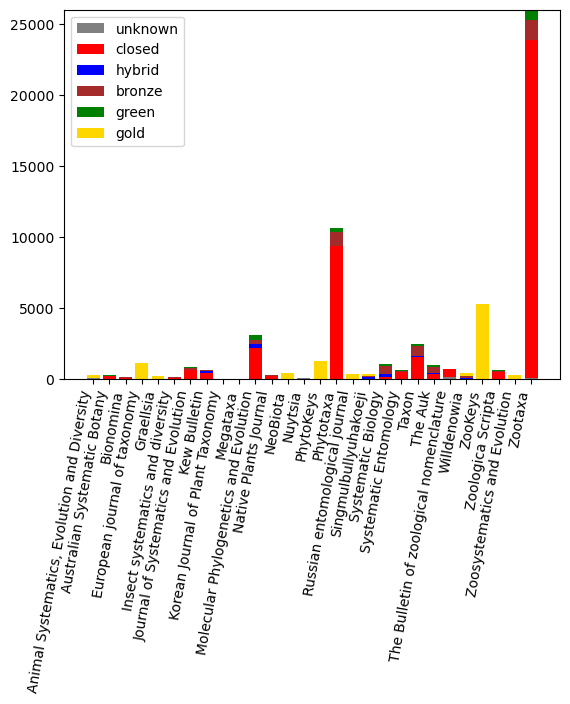

<Figure size 640x480 with 0 Axes>

In [16]:
labels = list(data_plot.index)
fig, ax = plt.subplots()

ax.bar(labels, data_plot["unknown"],
       label="unknown", color="grey")
ax.bar(labels, data_plot["closed"], bottom=data_plot["unknown"],
       label="closed", color="red")
ax.bar(labels, data_plot["hybrid"], bottom=data_plot["unknown"]+data_plot["closed"],
       label="hybrid", color="blue")
ax.bar(labels, data_plot["bronze"], bottom=data_plot["unknown"]+data_plot["closed"]+data_plot["hybrid"],
       label="bronze", color="brown")
ax.bar(labels, data_plot["green"], 
       bottom=data_plot["unknown"]+data_plot["closed"]+data_plot["hybrid"]+data_plot["bronze"],
       label="green", color="green")
ax.bar(labels, data_plot["gold"], 
       bottom=data_plot["unknown"]+data_plot["closed"]+data_plot["hybrid"]+data_plot["bronze"]+data_plot["green"],
       label="gold", color="gold")
ax.legend()

plt.xticks(rotation=80, ha="right")
plt.show()

plt.savefig("./figures/absolute_oa_status_journals.png")

In [39]:
percentages_oa

,"Animal Systematics, Evolution and Diversity",Australian Systematic Botany,Bionomina,European journal of taxonomy,Graellsia,Insect systematics and diversity,Journal of Systematics and Evolution,Kew Bulletin,Korean Journal of Plant Taxonomy,Megataxa,...,Systematic Biology,Systematic Entomology,Taxon,The Auk,The Bulletin of zoological nomenclature,Willdenowia,ZooKeys,Zoologica Scripta,Zoosystematics and Evolution,Zootaxa
gold,0.616197,0.000000,0.000000,0.994737,0.908297,0.000000,0.000000,0.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.443678,0.993210,0.000000,0.906810,0.000000
unknown,0.383803,0.018587,0.000000,0.001754,0.021834,0.000000,0.027939,0.010720,0.0,0.0,...,0.008242,0.009317,0.004453,0.003956,0.239102,0.006897,0.004149,0.003115,0.014337,0.003847
bronze,0.000000,0.100372,0.126761,0.000000,0.000000,0.281690,0.200233,0.044410,0.0,0.0,...,0.486264,0.083851,0.281377,0.451039,0.077939,0.236782,0.000377,0.054517,0.000000,0.054205
closed,0.000000,0.750929,0.866197,0.000000,0.034934,0.436620,0.693830,0.698315,0.0,0.0,...,0.122711,0.748447,0.638866,0.377844,0.673712,0.045977,0.000189,0.800623,0.071685,0.915327
green,0.000000,0.026022,0.007042,0.003509,0.034934,0.084507,0.044237,0.024502,0.0,0.0,...,0.143773,0.086957,0.051822,0.132542,0.009247,0.101149,0.002075,0.095016,0.007168,0.026622
hybrid,0.000000,0.104089,0.000000,0.000000,0.000000,0.197183,0.033760,0.222052,0.0,0.0,...,0.239011,0.071429,0.023482,0.034619,0.000000,0.165517,0.000000,0.046729,0.000000,0.000000


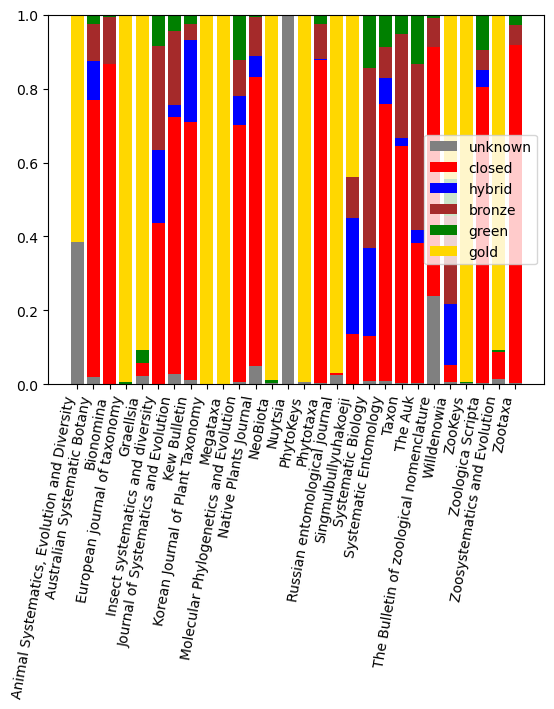

<Figure size 640x480 with 0 Axes>

In [43]:
percentages_oa = pd.DataFrame()

for _, journal in data_plot.iterrows():
    percentages_oa = pd.concat([percentages_oa, journal / sum(journal)], axis=1)

percentages_oa = percentages_oa.transpose()

fig, ax = plt.subplots()

ax.bar(labels, percentages_oa["unknown"],
       label="unknown", color="grey")
ax.bar(labels, percentages_oa["closed"], bottom=percentages_oa["unknown"],
       label="closed", color="red")
ax.bar(labels, percentages_oa["hybrid"], bottom=percentages_oa["unknown"]+percentages_oa["closed"],
       label="hybrid", color="blue")
ax.bar(labels, percentages_oa["bronze"], bottom=percentages_oa["unknown"]+percentages_oa["closed"]+percentages_oa["hybrid"],
       label="bronze", color="brown")
ax.bar(labels, percentages_oa["green"], 
       bottom=percentages_oa["unknown"]+percentages_oa["closed"]+percentages_oa["hybrid"]+percentages_oa["bronze"],
       label="green", color="green")
ax.bar(labels, percentages_oa["gold"], 
       bottom=percentages_oa["unknown"]+percentages_oa["closed"]+percentages_oa["hybrid"]+percentages_oa["bronze"]+percentages_oa["green"],
       label="gold", color="gold")
ax.legend()

plt.xticks(rotation=80, ha="right")
plt.show()

plt.savefig("./figures/relative_oa_status_journals.png")